In [1]:
# Install boto3 to access S3 and yt-dlp for Downloading YouTube videos
#!pip install boto3 yt-dlp

In [2]:
#!pip install s3fs

In [3]:
# Import required libraries
import boto3
import yt_dlp
import random
import os

In [4]:
import configparser

config = configparser.ConfigParser()
config.read('/home/ec2-user/.aws/credentials')

['/home/ec2-user/.aws/credentials']

In [5]:
# AWS credentials and S3 settings
aws_access_key_id = config["root"]['aws_access_key_id']
aws_secret_access_key = config["root"]['aws_secret_access_key']
bucket_name = 'asl-capstone'
prefix = 'youtube-asl/test_sample/'
save_path = '/content/temp_folder'
s3_URI = 's3://asl-capstone/'

In [6]:
# Initialize a Boto3 S3 client
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name='us-west-2'
)

In [7]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)

In [8]:
import pandas as pd
import re

# Define the file path to the Parquet file
parquet_file_path = s3_URI + 'youtube-asl/1000-samples/parsed/master_parquet.parquet'

# Load the Parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the DataFrame
df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt


In [9]:
#df.to_parquet(s3_URI + 'youtube-asl/1000-samples/cleaned_parquet/test.parquet')

In [10]:
#Count unique file names
unique_file_names = df['File Name'].nunique()

print("Number of unique File Names:", unique_file_names)



Number of unique File Names: 1152


In [11]:
# Clean Caption
def clean_caption(caption):
    # Convert all characters to lowercase
    caption = caption.lower()
    # Replace special characters with a space
    caption = re.sub(r'[^\w\s]', ' ', caption)
    # Remove ' t ' and replace with a space
    caption = caption.replace(' t ', ' ')
    # Remove 'll' and 's'
    caption = caption.replace(' ll ', ' ').replace(' s ', ' ')
    # Remove 'm' and 'u'
    caption = caption.replace(' m ', ' ').replace(' u ', ' ')
    # Replace double spaces with a single space
    caption = re.sub(r'\s+', ' ', caption)
    # Remove leading and trailing spaces
    return caption.strip()

# Apply the clean_caption function to each row in the 'Caption' column in a new column
df['Cleaned Caption'] = df['Caption'].apply(clean_caption)

# Display the DataFrame with the cleaned captions
df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...


In [12]:
# count unique words in a sentence
def count_unique_words(sentence):
    words = sentence.split()
    unique_words = set(words)
    return len(unique_words)

# Apply the function to each row in the 'Caption' column and store the results in a new column
df['Unique_Words_Count'] = df['Cleaned Caption'].apply(count_unique_words)

# Extract unique words from the 'clean_count' column of 'df'
unique_words_df = set(' '.join(df['Cleaned Caption']).split())
print("Total number of unique words in the 'Caption' column:", len(unique_words_df))



Total number of unique words in the 'Caption' column: 20767


In [13]:
# Count the number of words in the 'Cleaned Caption' column and add it as a new column
df['Caption Length'] = df['Cleaned Caption'].apply(lambda x: len(x.split()))

df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13


In [14]:
# Calculate the average sentence length
average_sentence_length = df['Caption Length'].mean()

print("Average Caption Length:", average_sentence_length, 'Words')

Average Caption Length: 8.549180854481207 Words


In [15]:
#!pip install wordcloud

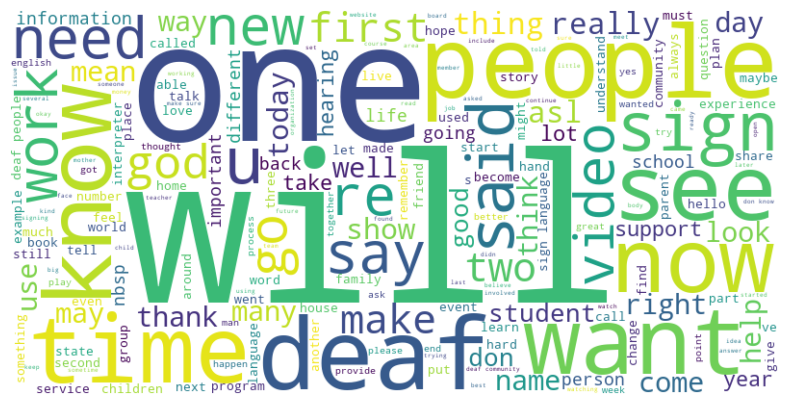

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned captions into a single string
all_cleaned_captions = ' '.join(df['Cleaned Caption'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_captions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
# Convert to datetime objects
df['Start Timestamp_dt'] = pd.to_datetime(df['Start Timestamp'])
df['End Timestamp_dt'] = pd.to_datetime(df['End Timestamp'])

df['Clip Duration'] = (df['End Timestamp_dt'] - df['Start Timestamp_dt']).dt.total_seconds()

df

/tmp/ipykernel_4188/2147227479.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Timestamp_dt'] = pd.to_datetime(df['Start Timestamp'])
/tmp/ipykernel_4188/2147227479.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['End Timestamp_dt'] = pd.to_datetime(df['End Timestamp'])


,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,2023-10-10 00:00:16.840,2023-10-10 00:00:25.420,8.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,2023-10-10 00:06:09.976,2023-10-10 00:06:14.705,4.729
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,2023-10-10 00:06:14.705,2023-10-10 00:06:19.265,4.560
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,2023-10-10 00:06:19.266,2023-10-10 00:06:23.600,4.334
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,2023-10-10 00:06:23.600,2023-10-10 00:06:33.120,9.520


In [18]:
# Calculate the average clip duration
average_clip_duration = df['Clip Duration'].mean()

print("Average Clip Duration:", average_clip_duration, 'seconds')


Average Clip Duration: 4.589971153228398 seconds


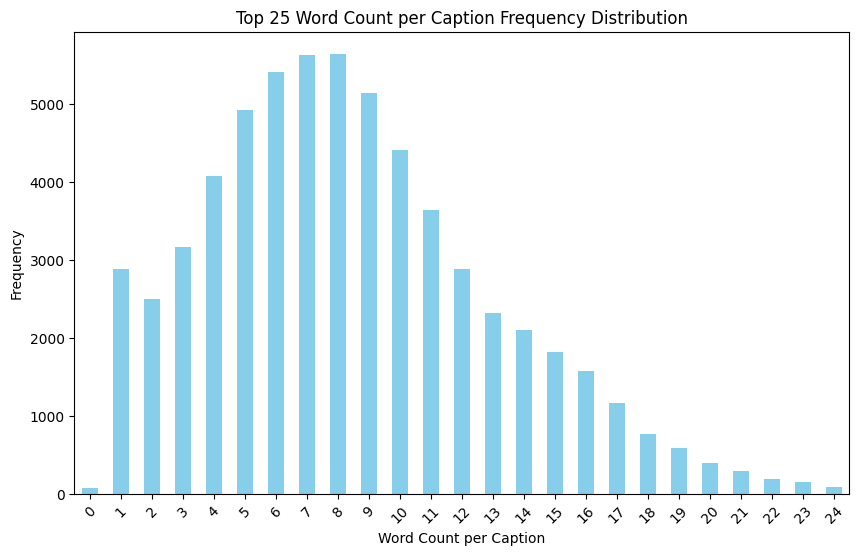

In [19]:
# Create a frequency distribution of the 'Caption Length' column
caption_length_distribution = df['Caption Length'].value_counts()

# Sort index
caption_length_distribution = caption_length_distribution.sort_index(ascending=True).head(25)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
caption_length_distribution.plot(kind='bar', color='skyblue')
plt.title('Top 25 Word Count per Caption Frequency Distribution')
plt.xlabel('Word Count per Caption')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

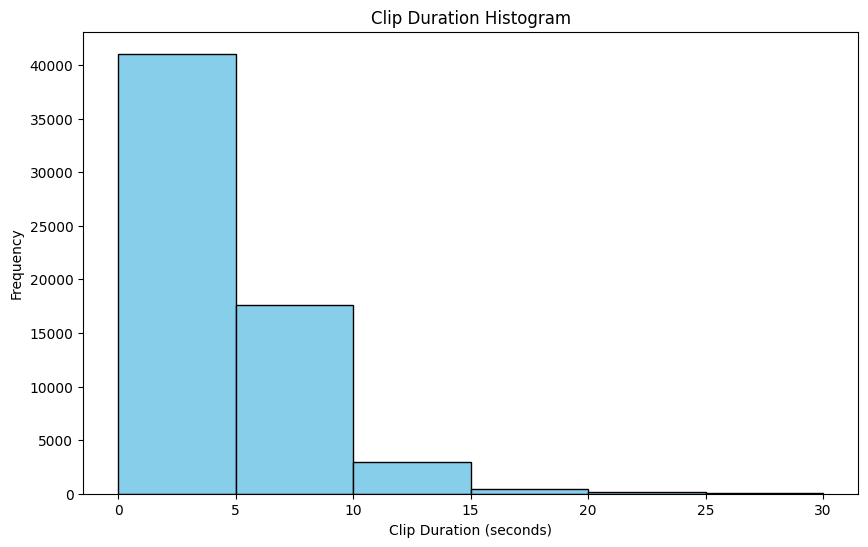

In [20]:
bin_edges = [0, 5, 10, 15, 20, 25, 30]

# Create a histogram for the 'Clip Duration' column
plt.figure(figsize=(10, 6))
plt.hist(df['Clip Duration'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Clip Duration Histogram')
plt.xlabel('Clip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [21]:
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [22]:
df['Words per second'] = df['Caption Length'] / df['Clip Duration']
df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,2023-10-10 00:00:16.840,2023-10-10 00:00:25.420,8.580,1.981352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,2023-10-10 00:06:09.976,2023-10-10 00:06:14.705,4.729,2.748996
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,2023-10-10 00:06:14.705,2023-10-10 00:06:19.265,4.560,3.070175
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,2023-10-10 00:06:19.266,2023-10-10 00:06:23.600,4.334,1.615136
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,2023-10-10 00:06:23.600,2023-10-10 00:06:33.120,9.520,1.365546


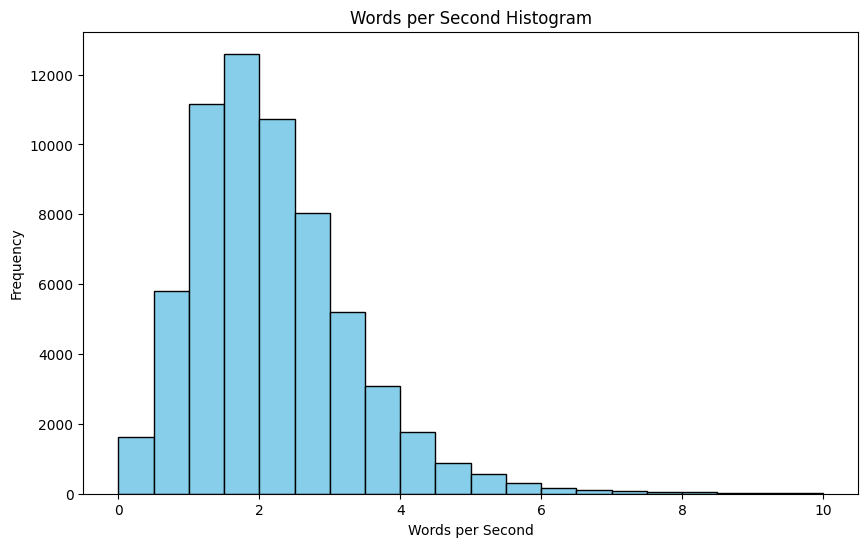

Standard Deviation of Words per Second: 4.738087522861188
Variance of Words per Second: 22.449473374292868


In [23]:
# Create a histogram for the 'Words per second' column
plt.figure(figsize=(10, 6))
plt.hist(df['Words per second'], bins=20, range=(0, 10), color='skyblue', edgecolor='black')
plt.title('Words per Second Histogram')
plt.xlabel('Words per Second')
plt.ylabel('Frequency')
plt.show()

# Print the standard deviation and variance of the 'Words per second' column
std_deviation = df['Words per second'].std()
variance = df['Words per second'].var()

print(f'Standard Deviation of Words per Second: {std_deviation}')
print(f'Variance of Words per Second: {variance}')

In [24]:
# Full sentence checker
def full_sentence(caption):
    #check if the caption matches the pattern
    pattern = r'^[A-Z].*\.$'
    return bool(re.match(pattern, caption))

# Apply the function to each row in the 'Caption' column and add the result as a new column
df['Full Sentence'] = df['Caption'].apply(full_sentence)

df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714,True
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791,True
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000,True
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146,True
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,2023-10-10 00:00:16.840,2023-10-10 00:00:25.420,8.580,1.981352,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,2023-10-10 00:06:09.976,2023-10-10 00:06:14.705,4.729,2.748996,False
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,2023-10-10 00:06:14.705,2023-10-10 00:06:19.265,4.560,3.070175,False
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,2023-10-10 00:06:19.266,2023-10-10 00:06:23.600,4.334,1.615136,False
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,2023-10-10 00:06:23.600,2023-10-10 00:06:33.120,9.520,1.365546,True


In [25]:
# Add a new column 'Period Count' to count the number of periods in each caption
df['Period Count'] = df['Caption'].str.count('\.')

df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714,True,1
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791,True,1
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000,True,1
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146,True,1
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,2023-10-10 00:00:16.840,2023-10-10 00:00:25.420,8.580,1.981352,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,2023-10-10 00:06:09.976,2023-10-10 00:06:14.705,4.729,2.748996,False,0
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,2023-10-10 00:06:14.705,2023-10-10 00:06:19.265,4.560,3.070175,False,0
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,2023-10-10 00:06:19.266,2023-10-10 00:06:23.600,4.334,1.615136,False,1
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,2023-10-10 00:06:23.600,2023-10-10 00:06:33.120,9.520,1.365546,True,1


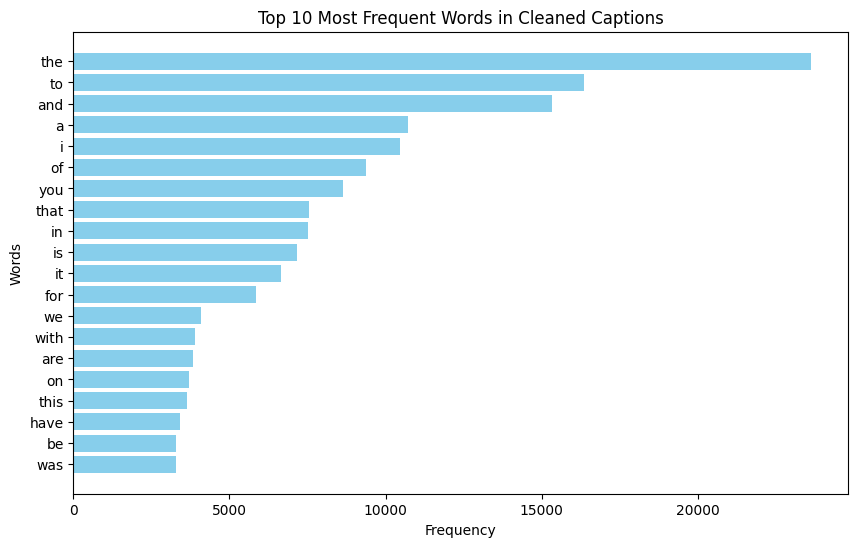

In [26]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Combine all 'Cleaned Caption' values into a single string
all_cleaned_caption = ' '.join(df['Cleaned Caption'])

# Split the combined text into words
words = all_cleaned_caption.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most frequent words
top_10_words = word_counts.most_common(20)

# Extract words and their counts from the top 10 list
top_words, counts = zip(*top_10_words)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in Cleaned Captions')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

In [27]:
# Calculate the sum of 'Caption Length' column
sum_caption_length = df['Caption Length'].sum()

# Calculate the ratio
ratio_caption_length_to_unique_words = sum_caption_length / len(unique_words_df)

# Print the result
print("Sum of Caption Length / Sum of Unique Words Count Ratio:", ratio_caption_length_to_unique_words)

Sum of Caption Length / Sum of Unique Words Count Ratio: 25.630664034285164


In [28]:
df.describe()

,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Period Count
count,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260,62260,62260.000000,62260.000000,62260.000000
mean,29.713860,425.441869,430.031840,12430.299936,12566.856200,12430.297462,12566.855168,8.112159,8.549181,2023-10-10 00:07:05.441869056,2023-10-10 00:07:10.031840256,4.589971,2.205910,0.641198
min,13.333333,0.000000,0.033000,0.000000,1.000000,0.000000,0.989011,0.000000,0.000000,2023-10-10 00:00:00,2023-10-10 00:00:00.033000,0.006000,0.000000,0.000000
25%,29.873000,80.912750,85.651750,2380.750000,2520.000000,2380.654945,2520.000000,5.000000,5.000000,2023-10-10 00:01:20.912749824,2023-10-10 00:01:25.651749888,2.400000,1.376147,0.000000
50%,29.970030,204.365000,209.320000,5945.000000,6085.000000,5944.692707,6084.797502,8.000000,8.000000,2023-10-10 00:03:24.364999936,2023-10-10 00:03:29.320000,3.820000,1.998002,1.000000
75%,29.970030,455.560000,460.635000,13265.500000,13438.000000,13265.890909,13437.974026,11.000000,11.000000,2023-10-10 00:07:35.560000,2023-10-10 00:07:40.635000064,5.875750,2.759778,1.000000
max,60.000000,4954.100000,4957.200000,148623.000000,148716.000000,148623.000000,148716.000000,75.000000,110.000000,2023-10-10 01:22:34.100000,2023-10-10 01:22:37.200000,620.980000,1000.000000,27.000000
std,6.977737,664.750026,664.333159,19757.298897,19745.639879,19757.298062,19745.638812,4.400616,4.955071,NaN,NaN,4.128008,4.738088,0.798975


In [29]:
### NUMBER OF False WITH PERIODS
# Filter the DataFrame
filtered_df = df[(df['Full Sentence'] == False) & (df['Period Count'] > 0)]

filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
5,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:25.420,00:00:31.320,tropics are already stirring.,29.97003,25.420,31.320,762,939,761.838162,938.661339,5_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,tropics are already stirring,4,4,2023-10-10 00:00:25.420,2023-10-10 00:00:31.320,5.900,0.677966,False,1
6,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:31.320,00:00:36.780,"This is a look at ""Invest 90-L.""",29.97003,31.320,36.780,939,1102,938.661339,1102.297702,6_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,this is a look at invest 90 l,8,8,2023-10-10 00:00:31.320,2023-10-10 00:00:36.780,5.460,1.465201,False,1
8,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:48.620,00:00:59.940,into a subtropical or tropical depression\nove...,29.97003,48.620,59.940,1457,1796,1457.142857,1796.403596,8_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,into a subtropical or tropical depression over...,11,11,2023-10-10 00:00:48.620,2023-10-10 00:00:59.940,11.320,0.971731,False,1
9,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:59.940,00:01:05.740,And there's even a chance it could develop\nin...,29.97003,59.940,65.740,1796,1970,1796.403596,1970.229770,9_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,and there even a chance it could develop into ...,11,12,2023-10-10 00:00:59.940,2023-10-10 00:01:05.740,5.800,2.068966,False,1
11,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:01:17.400,00:01:23.260,want to keep an eye on this.,29.97003,77.400,83.260,2320,2495,2319.680320,2495.304695,11_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,want to keep an eye on this,7,7,2023-10-10 00:01:17.400,2023-10-10 00:01:23.260,5.860,1.194539,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62249,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:05:26.513,00:05:35.406,happen but may&nbsp;be impossible or difficult...,30.00000,326.513,335.406,9795,10062,9795.390000,10062.180000,42_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,happen but may nbsp be impossible or difficult...,10,10,2023-10-10 00:05:26.513,2023-10-10 00:05:35.406,8.893,1.124480,False,1
62251,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:05:44.320,00:05:53.061,understanding about stalking.,30.00000,344.320,353.061,10330,10592,10329.600000,10591.830000,44_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,understanding about stalking,3,3,2023-10-10 00:05:44.320,2023-10-10 00:05:53.061,8.741,0.343210,False,1
62252,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:05:53.062,00:05:58.720,not everyone&nbsp;who has one of these behavio...,30.00000,353.062,358.720,10592,10762,10591.860000,10761.600000,45_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,not everyone nbsp who has one of these behavio...,12,12,2023-10-10 00:05:53.062,2023-10-10 00:05:58.720,5.658,2.120891,False,1
62254,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:06.198,00:06:09.976,repeatedly harassing someone.,30.00000,366.198,369.976,10986,11099,10985.940000,11099.280000,47_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,repeatedly harassing someone,3,3,2023-10-10 00:06:06.198,2023-10-10 00:06:09.976,3.778,0.794071,False,1


In [30]:
### NUMBER OF False WITH PERIODS
# Filter the DataFrame
filtered_df = df[(df['Full Sentence'] == False) & (df['Period Count'] > 1)]

filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
142,youtube-asl/1000-samples/-HkeOGWJWLI.en.vtt,00:02:05.500,00:02:09.454,www.fusewireless.com,29.97003,125.500,129.454,3761,3880,3761.238761,3879.740260,32_youtube-asl/1000-samples/-HkeOGWJWLI.en.vtt,www fusewireless com,3,3,2023-10-10 00:02:05.500,2023-10-10 00:02:09.454,3.954,0.758725,False,2
145,youtube-asl/1000-samples/-JGpOd2AlVY.en-xgJ5vo...,00:00:25.000,00:00:35.000,"For more services, \nvisit www.DSUCC.ORG",29.97003,25.000,35.000,749,1049,749.250749,1048.951049,2_youtube-asl/1000-samples/-JGpOd2AlVY.en-xgJ5...,for more services visit www dsucc org,7,7,2023-10-10 00:00:25.000,2023-10-10 00:00:35.000,10.000,0.700000,False,2
147,youtube-asl/1000-samples/-JGpOd2AlVY.en-xgJ5vo...,00:00:45.000,00:00:55.000,Visit www.HandSpeak.com,29.97003,45.000,55.000,1349,1648,1348.651349,1648.351648,4_youtube-asl/1000-samples/-JGpOd2AlVY.en-xgJ5...,visit www handspeak com,4,4,2023-10-10 00:00:45.000,2023-10-10 00:00:55.000,10.000,0.400000,False,2
323,youtube-asl/1000-samples/-ZOyG_dW_1M.en.vtt,00:08:30.833,00:08:39.041,"""there is no war with Iran.\nAn airstrike is n...",24.00000,510.833,519.041,12260,12457,12259.992000,12456.984000,83_youtube-asl/1000-samples/-ZOyG_dW_1M.en.vtt,there is no war with iran an airstrike is not war,9,11,2023-10-10 00:08:30.833,2023-10-10 00:08:39.041,8.208,1.340156,False,2
337,youtube-asl/1000-samples/-ZOyG_dW_1M.en.vtt,00:10:13.250,00:10:23.500,"""Grey's Anatomy"" at 9 p.m.\nEastern Time tonig...",24.00000,613.250,623.500,14718,14964,14718.000000,14964.000000,97_youtube-asl/1000-samples/-ZOyG_dW_1M.en.vtt,grey anatomy at 9 p eastern time tonight on abc,10,10,2023-10-10 00:10:13.250,2023-10-10 00:10:23.500,10.250,0.975610,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62134,youtube-asl/1000-samples/zsX7rrJK2Ho.en.vtt,00:03:51.965,00:03:56.369,"D.O.P., Italian sausage,",29.97003,231.965,236.369,6952,7084,6951.998002,7083.986014,71_youtube-asl/1000-samples/zsX7rrJK2Ho.en.vtt,d o p italian sausage,5,5,2023-10-10 00:03:51.965,2023-10-10 00:03:56.369,4.404,1.135332,False,3
62138,youtube-asl/1000-samples/zsX7rrJK2Ho.en.vtt,00:04:09.249,00:04:11.718,lemon curd filling...,29.97003,249.249,251.718,7470,7544,7470.000000,7543.996004,75_youtube-asl/1000-samples/zsX7rrJK2Ho.en.vtt,lemon curd filling,3,3,2023-10-10 00:04:09.249,2023-10-10 00:04:11.718,2.469,1.215067,False,3
62194,youtube-asl/1000-samples/zw3idxiuYL8.en.vtt,00:02:49.460,00:02:52.180,or just walking. Must keep staying away from o...,29.97003,169.460,172.180,5079,5160,5078.721279,5160.239760,30_youtube-asl/1000-samples/zw3idxiuYL8.en.vtt,or just walking must keep staying away from ot...,9,9,2023-10-10 00:02:49.460,2023-10-10 00:02:52.180,2.720,3.308824,False,2
62213,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:00:56.478,00:01:05.291,to share their partner's&nbsp;attention with a...,30.00000,56.478,65.291,1694,1959,1694.340000,1958.730000,6_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,to share their partner nbsp attention with any...,12,12,2023-10-10 00:00:56.478,2023-10-10 00:01:05.291,8.813,1.361625,False,2


**Data Cleaning Process**


In [31]:
# List of columns to count zeroes in
columns_to_count_zeroes = ['Unique_Words_Count', 'Caption Length', 'Clip Duration', 'Words per second', 'Period Count']

# Count zeroes in each column
zero_counts = df[columns_to_count_zeroes].apply(lambda x: (x == 0).sum())

# Display the counts
print(zero_counts)

Unique_Words_Count       76
Caption Length           76
Clip Duration             0
Words per second         76
Period Count          29690
dtype: int64


In [32]:
# Filter the DataFrame to get rows where 'Unique_Words_Count' is 0
rows_with_zero_unique_words = df[df['Unique_Words_Count'] == 0]

rows_with_zero_unique_words

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
3344,youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,00:00:26.875,00:00:27.875,,29.79000,26.875,27.875,801,830,800.606250,830.396250,5_youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,,0,0,2023-10-10 00:00:26.875,2023-10-10 00:00:27.875,1.00,0.0,False,0
3345,youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,00:00:28.075,00:00:29.075,,29.79000,28.075,29.075,836,866,836.354250,866.144250,6_youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,,0,0,2023-10-10 00:00:28.075,2023-10-10 00:00:29.075,1.00,0.0,False,0
9060,youtube-asl/1000-samples/9cIomSQEspQ.en.vtt,00:00:30.600,00:00:31.160,,29.97003,30.600,31.160,917,934,917.082917,933.866134,7_youtube-asl/1000-samples/9cIomSQEspQ.en.vtt,,0,0,2023-10-10 00:00:30.600,2023-10-10 00:00:31.160,0.56,0.0,False,0
9699,youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,00:00:30.560,00:00:31.060,,29.00000,30.560,31.060,886,901,886.240000,900.740000,8_youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,,0,0,2023-10-10 00:00:30.560,2023-10-10 00:00:31.060,0.50,0.0,False,0
9700,youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,00:00:31.060,00:00:31.560,,29.00000,31.060,31.560,901,915,900.740000,915.240000,9_youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,,0,0,2023-10-10 00:00:31.060,2023-10-10 00:00:31.560,0.50,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62045,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:02:50.860,00:02:56.400,,29.97003,170.860,176.400,5121,5287,5120.679321,5286.713287,22_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:02:50.860,2023-10-10 00:02:56.400,5.54,0.0,False,0
62046,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:00.020,00:03:06.480,,29.97003,180.020,186.480,5395,5589,5395.204795,5588.811189,23_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:00.020,2023-10-10 00:03:06.480,6.46,0.0,False,0
62050,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:33.260,00:03:40.380,,29.97003,213.260,220.380,6391,6605,6391.408591,6604.795205,27_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:33.260,2023-10-10 00:03:40.380,7.12,0.0,False,0
62051,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:43.520,00:03:45.560,,29.97003,223.520,225.560,6699,6760,6698.901099,6760.039960,28_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:43.520,2023-10-10 00:03:45.560,2.04,0.0,False,0


In [33]:
# Filter the DataFrame to get rows where 'Caption Length' is 0
rows_with_zero_caption_length = df[df['Caption Length'] == 0]

rows_with_zero_caption_length

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
3344,youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,00:00:26.875,00:00:27.875,,29.79000,26.875,27.875,801,830,800.606250,830.396250,5_youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,,0,0,2023-10-10 00:00:26.875,2023-10-10 00:00:27.875,1.00,0.0,False,0
3345,youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,00:00:28.075,00:00:29.075,,29.79000,28.075,29.075,836,866,836.354250,866.144250,6_youtube-asl/1000-samples/37O1I0qQC38.en-US.vtt,,0,0,2023-10-10 00:00:28.075,2023-10-10 00:00:29.075,1.00,0.0,False,0
9060,youtube-asl/1000-samples/9cIomSQEspQ.en.vtt,00:00:30.600,00:00:31.160,,29.97003,30.600,31.160,917,934,917.082917,933.866134,7_youtube-asl/1000-samples/9cIomSQEspQ.en.vtt,,0,0,2023-10-10 00:00:30.600,2023-10-10 00:00:31.160,0.56,0.0,False,0
9699,youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,00:00:30.560,00:00:31.060,,29.00000,30.560,31.060,886,901,886.240000,900.740000,8_youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,,0,0,2023-10-10 00:00:30.560,2023-10-10 00:00:31.060,0.50,0.0,False,0
9700,youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,00:00:31.060,00:00:31.560,,29.00000,31.060,31.560,901,915,900.740000,915.240000,9_youtube-asl/1000-samples/ALnkXxhqaxA.en.vtt,,0,0,2023-10-10 00:00:31.060,2023-10-10 00:00:31.560,0.50,0.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62045,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:02:50.860,00:02:56.400,,29.97003,170.860,176.400,5121,5287,5120.679321,5286.713287,22_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:02:50.860,2023-10-10 00:02:56.400,5.54,0.0,False,0
62046,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:00.020,00:03:06.480,,29.97003,180.020,186.480,5395,5589,5395.204795,5588.811189,23_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:00.020,2023-10-10 00:03:06.480,6.46,0.0,False,0
62050,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:33.260,00:03:40.380,,29.97003,213.260,220.380,6391,6605,6391.408591,6604.795205,27_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:33.260,2023-10-10 00:03:40.380,7.12,0.0,False,0
62051,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,00:03:43.520,00:03:45.560,,29.97003,223.520,225.560,6699,6760,6698.901099,6760.039960,28_youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,,0,0,2023-10-10 00:03:43.520,2023-10-10 00:03:45.560,2.04,0.0,False,0


In [34]:
# Filter the DataFrame to get rows where 'Words per second' is greater than 30
rows_with_words_per_second_gt_20 = df[df['Words per second'] > 20]

rows_with_words_per_second_gt_20

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
4617,youtube-asl/1000-samples/4W-g21npdkg.en.vtt,00:11:21.120,00:11:21.150,He would have respected both Cain and Abel.,23.976024,681.120,681.150,16331,16331,16330.549451,16331.268731,187_youtube-asl/1000-samples/4W-g21npdkg.en.vtt,he would have respected both cain and abel,8,8,2023-10-10 00:11:21.120,2023-10-10 00:11:21.150,0.030,266.666667,True,1
4626,youtube-asl/1000-samples/4W-g21npdkg.en.vtt,00:11:59.150,00:11:59.250,2) she ignores valid and sincere questions of ...,23.976024,719.150,719.250,17242,17245,17242.357642,17244.755245,196_youtube-asl/1000-samples/4W-g21npdkg.en.vtt,2 she ignores valid and sincere questions of h...,10,10,2023-10-10 00:11:59.150,2023-10-10 00:11:59.250,0.100,100.000000,False,0
4641,youtube-asl/1000-samples/4W-g21npdkg.en.vtt,00:12:45.500,00:12:45.610,God does not bless false teachers. They are to...,23.976024,765.500,765.610,18354,18356,18353.646354,18356.283716,211_youtube-asl/1000-samples/4W-g21npdkg.en.vtt,god does not bless false teachers they are to ...,11,11,2023-10-10 00:12:45.500,2023-10-10 00:12:45.610,0.110,100.000000,True,2
8011,youtube-asl/1000-samples/8Nw9ABhSbvc.en.vtt,00:03:09.187,00:03:09.490,Learn ASL in 31 Days: Day 4,25.930000,189.187,189.490,4906,4913,4905.618910,4913.475700,32_youtube-asl/1000-samples/8Nw9ABhSbvc.en.vtt,learn asl in 31 days day 4,7,7,2023-10-10 00:03:09.187,2023-10-10 00:03:09.490,0.303,23.102310,False,0
14134,youtube-asl/1000-samples/EoByRQldF-4.en-US.vtt,00:17:12.820,00:17:13.320,"kind of formal. Have your hair back, and don't...",30.000000,1032.820,1033.320,30985,31000,30984.600000,30999.600000,84_youtube-asl/1000-samples/EoByRQldF-4.en-US.vtt,kind of formal have your hair back and don hav...,15,18,2023-10-10 00:17:12.820,2023-10-10 00:17:13.320,0.500,36.000000,False,3
20183,youtube-asl/1000-samples/JwUpFXZWimU.en.vtt,00:01:17.010,00:01:17.016,So please pray and thank you.,29.970030,77.010,77.016,2308,2308,2307.992008,2308.171828,23_youtube-asl/1000-samples/JwUpFXZWimU.en.vtt,so please pray and thank you,6,6,2023-10-10 00:01:17.010,2023-10-10 00:01:17.016,0.006,1000.000000,True,1
29726,youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,00:00:51.160,00:00:51.330,He takes from the rich and does not give to th...,29.970030,51.160,51.330,1533,1538,1533.266733,1538.361638,8_youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,he takes from the rich and does not give to th...,15,17,2023-10-10 00:00:51.160,2023-10-10 00:00:51.330,0.170,100.000000,True,1
29731,youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,00:01:16.760,00:01:17.860,I'm a little boy and when I was watching this ...,29.970030,76.760,77.860,2300,2333,2300.499500,2333.466533,13_youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,i a little boy and when i was watching this sh...,20,24,2023-10-10 00:01:16.760,2023-10-10 00:01:17.860,1.100,21.818182,True,1
29741,youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,00:02:08.890,00:02:09.086,Well let me tell you: these interpreters that ...,29.970030,128.890,129.086,3863,3869,3862.837163,3868.711289,23_youtube-asl/1000-samples/VSfgzF_mAu4.en.vtt,well let me tell you these interpreters that w...,14,16,2023-10-10 00:02:08.890,2023-10-10 00:02:09.086,0.196,81.632653,True,1
33555,youtube-asl/1000-samples/YakYyLLxdyc.en-US.vtt,00:00:50.850,00:00:52.850,"Before, with my first child, 5 years ago the n...",60.000000,50.850,52.850,3051,3171,3051.000000,3171.000000,4_youtube-asl/1000-samples/YakYyLLxdyc.en-US.vtt,before with my first child 5 years ago the nur...,41,52,2023-10-10 00:00:50.850,2023-10-10 00:00:52.850,2.000,26.000000,True,3


**FULL SENTENCE**

In [35]:
filtered_df = df[df['Full Sentence'] == True]
filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714,True,1
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791,True,1
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000,True,1
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146,True,1
17,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:02:15.180,00:02:17.020,Friday morning and turned himself in to author...,29.97003,135.180,137.020,4051,4106,4051.348651,4106.493506,17_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,friday morning and turned himself in to author...,8,8,2023-10-10 00:02:15.180,2023-10-10 00:02:17.020,1.840,4.347826,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:02.034,00:04:12.794,This is the power to affect how someone lives ...,30.00000,242.034,252.794,7261,7584,7261.020000,7583.820000,32_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,this is the power to affect how someone lives ...,12,12,2023-10-10 00:04:02.034,2023-10-10 00:04:12.794,10.760,1.115242,True,1
62243,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:37.106,00:04:40.960,This is control over the victim.,30.00000,277.106,280.960,8313,8429,8313.180000,8428.800000,36_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,this is control over the victim,6,6,2023-10-10 00:04:37.106,2023-10-10 00:04:40.960,3.854,1.556824,True,1
62244,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:40.960,00:04:48.800,Delusional is confusing the&nbsp;difference be...,30.00000,280.960,288.800,8429,8664,8428.800000,8664.000000,37_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,delusional is confusing the nbsp difference be...,10,10,2023-10-10 00:04:40.960,2023-10-10 00:04:48.800,7.840,1.275510,True,1
62247,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:05:14.489,00:05:20.879,Actively imagining things that are not real.,30.00000,314.489,320.879,9435,9626,9434.670000,9626.370000,40_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,actively imagining things that are not real,7,7,2023-10-10 00:05:14.489,2023-10-10 00:05:20.879,6.390,1.095462,True,1


In [36]:
filtered_df_with_one_period = filtered_df[filtered_df['Period Count'] == 1]
filtered_df_with_one_period

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714,True,1
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791,True,1
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000,True,1
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146,True,1
17,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:02:15.180,00:02:17.020,Friday morning and turned himself in to author...,29.97003,135.180,137.020,4051,4106,4051.348651,4106.493506,17_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,friday morning and turned himself in to author...,8,8,2023-10-10 00:02:15.180,2023-10-10 00:02:17.020,1.840,4.347826,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:02.034,00:04:12.794,This is the power to affect how someone lives ...,30.00000,242.034,252.794,7261,7584,7261.020000,7583.820000,32_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,this is the power to affect how someone lives ...,12,12,2023-10-10 00:04:02.034,2023-10-10 00:04:12.794,10.760,1.115242,True,1
62243,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:37.106,00:04:40.960,This is control over the victim.,30.00000,277.106,280.960,8313,8429,8313.180000,8428.800000,36_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,this is control over the victim,6,6,2023-10-10 00:04:37.106,2023-10-10 00:04:40.960,3.854,1.556824,True,1
62244,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:40.960,00:04:48.800,Delusional is confusing the&nbsp;difference be...,30.00000,280.960,288.800,8429,8664,8428.800000,8664.000000,37_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,delusional is confusing the nbsp difference be...,10,10,2023-10-10 00:04:40.960,2023-10-10 00:04:48.800,7.840,1.275510,True,1
62247,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:05:14.489,00:05:20.879,Actively imagining things that are not real.,30.00000,314.489,320.879,9435,9626,9434.670000,9626.370000,40_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,actively imagining things that are not real,7,7,2023-10-10 00:05:14.489,2023-10-10 00:05:20.879,6.390,1.095462,True,1


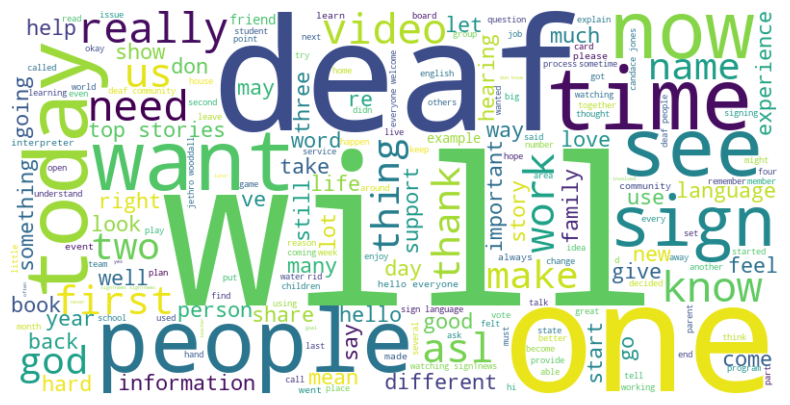

In [37]:
# Concatenate all cleaned captions into a single string
all_cleaned_captions = ' '.join(filtered_df_with_one_period['Cleaned Caption'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_captions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Frame Data Analysis**

In [38]:
df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,2023-10-10 00:00:06.320,2023-10-10 00:00:07.440,1.120,1.785714,True,1
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2023-10-10 00:00:07.440,2023-10-10 00:00:10.020,2.580,1.162791,True,1
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,2023-10-10 00:00:10.020,2023-10-10 00:00:11.220,1.200,2.500000,True,1
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,2023-10-10 00:00:11.220,2023-10-10 00:00:14.500,3.280,2.134146,True,1
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,2023-10-10 00:00:16.840,2023-10-10 00:00:25.420,8.580,1.981352,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,11099.280000,11241.150000,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,2023-10-10 00:06:09.976,2023-10-10 00:06:14.705,4.729,2.748996,False,0
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,11241.150000,11377.950000,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,2023-10-10 00:06:14.705,2023-10-10 00:06:19.265,4.560,3.070175,False,0
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,11377.980000,11508.000000,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,2023-10-10 00:06:19.266,2023-10-10 00:06:23.600,4.334,1.615136,False,1
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,11508.000000,11793.600000,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,2023-10-10 00:06:23.600,2023-10-10 00:06:33.120,9.520,1.365546,True,1


In [39]:
df['frame_count'] = df['end_frame'] - df['start_frame']
df.drop(columns=['Start Timestamp_dt', 'End Timestamp_dt'], inplace=True)
df.drop(columns=['start_frame_float', 'end_frame_float'], inplace=True)

df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,1.120,1.785714,True,1,34
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2.580,1.162791,True,1,77
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,1.200,2.500000,True,1,36
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,3.280,2.134146,True,1,99
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,8.580,1.981352,False,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,4.729,2.748996,False,0,142
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,4.560,3.070175,False,0,137
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,4.334,1.615136,False,1,130
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,9.520,1.365546,True,1,286


In [40]:
df.describe()

,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Period Count,frame_count
count,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000,62260.000000
mean,29.713860,425.441869,430.031840,12430.299936,12566.856200,8.112159,8.549181,4.589971,2.205910,0.641198,136.556264
std,6.977737,664.750026,664.333159,19757.298897,19745.639879,4.400616,4.955071,4.128008,4.738088,0.798975,130.458035
min,13.333333,0.000000,0.033000,0.000000,1.000000,0.000000,0.000000,0.006000,0.000000,0.000000,0.000000
25%,29.873000,80.912750,85.651750,2380.750000,2520.000000,5.000000,5.000000,2.400000,1.376147,0.000000,69.000000
50%,29.970030,204.365000,209.320000,5945.000000,6085.000000,8.000000,8.000000,3.820000,1.998002,1.000000,109.000000
75%,29.970030,455.560000,460.635000,13265.500000,13438.000000,11.000000,11.000000,5.875750,2.759778,1.000000,173.000000
max,60.000000,4954.100000,4957.200000,148623.000000,148716.000000,75.000000,110.000000,620.980000,1000.000000,27.000000,18611.000000


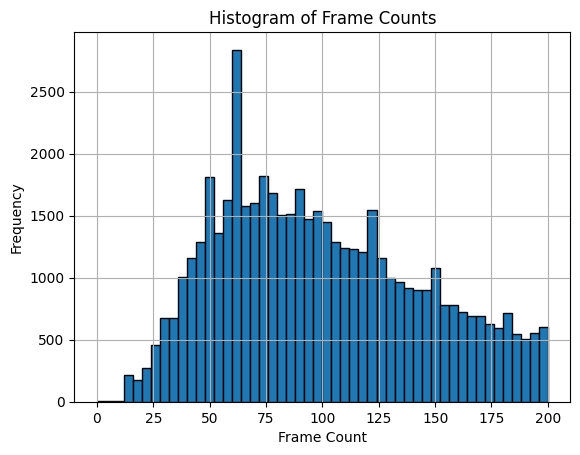

Standard Deviation of frame_count: 130.45803548860874
Variance of frame_count: 17019.2990235471


In [41]:
plt.hist(df['frame_count'], bins=50, range=(0, 200), edgecolor='k') 
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.title('Histogram of Frame Counts')
plt.grid(True)
plt.show()

# standard deviation and variance
std_framecount = df['frame_count'].std()
var_framecount = df['frame_count'].var()

#
print(f"Standard Deviation of frame_count: {std_framecount}")
print(f"Variance of frame_count: {var_framecount}")

In [42]:
# Count NaN values in 'start_time_seconds' and 'end_time_seconds' columns
nan_count_start = df['start_time_seconds'].isna().sum()
nan_count_end = df['end_time_seconds'].isna().sum()
wps = df['Words per second'].isna().sum()

print("Number of NaN values in 'start_time_seconds':", nan_count_start)
print("Number of NaN values in 'end_time_seconds':", nan_count_end)
print("Number of NaN values in 'Words per second':", wps)

Number of NaN values in 'start_time_seconds': 0
Number of NaN values in 'end_time_seconds': 0
Number of NaN values in 'Words per second': 0


In [43]:
# Filter rows where either 'start_time_seconds' or 'end_time_seconds' is null
#filtered_df = df[pd.isnull(df['start_time_seconds']) | pd.isnull(df['end_time_seconds'])]

#filtered_df

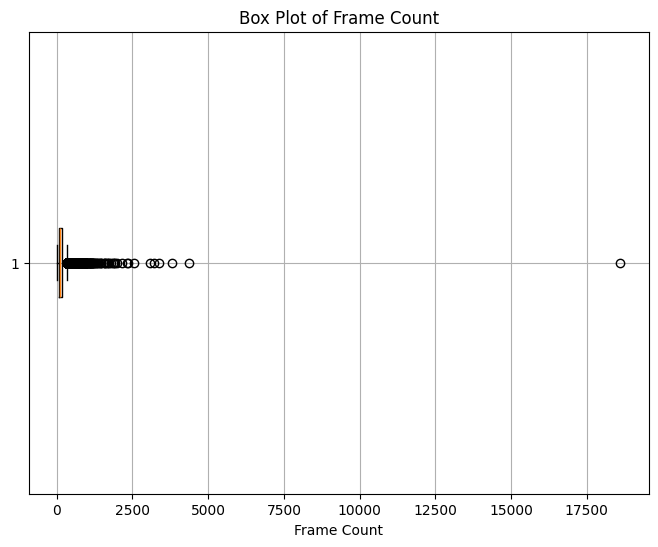

In [47]:
frame_count_data = df['frame_count']

plt.figure(figsize=(8, 6))
plt.boxplot(frame_count_data, vert=False) 
plt.grid(True)
plt.title('Box Plot of Frame Count')
plt.xlabel('Frame Count')
plt.show()

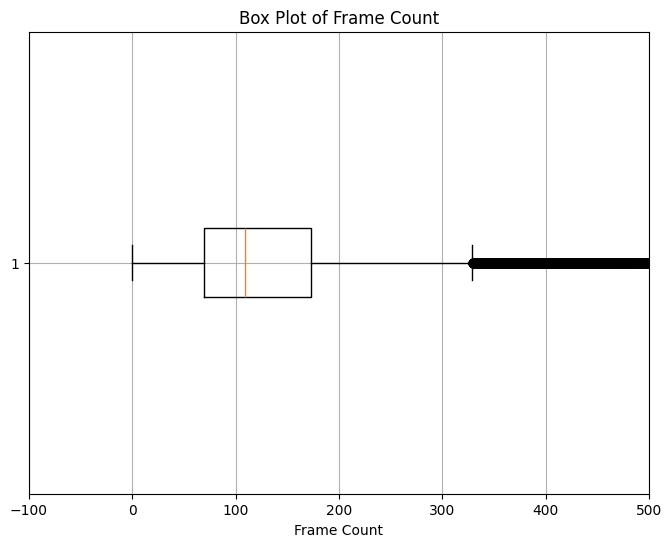

In [57]:
frame_count_data = df['frame_count']

plt.figure(figsize=(8, 6))
plt.boxplot(frame_count_data, vert=False) 
plt.xlim(-100, 500)
plt.grid(True)
plt.title('Box Plot of Frame Count')
plt.xlabel('Frame Count')
plt.show()

In [60]:
# Calculate the quartiles + other stats
Q1 = df['frame_count'].quantile(0.25)
Q2 = df['frame_count'].quantile(0.50)  #Median
Q3 = df['frame_count'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR


print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile or median):", Q2)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)
print("Upper Limit:", upper_limit)


Q1 (25th percentile): 69.0
Q2 (50th percentile or median): 109.0
Q3 (75th percentile): 173.0
Interquartile Range (IQR): 104.0
Upper Limit: 329.0


In [61]:
outlier_df = df[df['frame_count'] > 329]
outlier_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
7,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:36.800,00:00:48.620,The National Hurricane Center says there is\na...,29.97003,36.800,48.620,1103,1457,7_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,the national hurricane center says there is a ...,15,16,11.820,1.353638,False,0,354
8,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:48.620,00:00:59.940,into a subtropical or tropical depression\nove...,29.97003,48.620,59.940,1457,1796,8_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,into a subtropical or tropical depression over...,11,11,11.320,0.971731,False,1,339
10,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:01:05.740,00:01:17.400,So if you have Memorial Day plans anywhere\nfr...,29.97003,65.740,77.400,1970,2320,10_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,so if you have memorial day plans anywhere fro...,14,15,11.660,1.286449,False,0,350
12,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:01:23.260,00:01:35.680,Scientists predict this Atlantic hurricane\nse...,29.97003,83.260,95.680,2495,2868,12_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,scientists predict this atlantic hurricane sea...,13,13,12.420,1.046699,False,0,373
14,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:01:43.280,00:01:55.360,2017 was particularly active with six major\nh...,29.97003,103.280,115.360,3095,3457,14_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,2017 was particularly active with six major hu...,11,12,12.080,0.993377,False,0,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62207,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:00:11.280,00:00:22.560,The following video contains material that may...,30.00000,11.280,22.560,338,677,0_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,the following video contains material that may...,15,15,11.280,1.329787,False,1,339
62223,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:02:08.865,00:02:20.603,Obsession and compulsiveness means to dwell on...,30.00000,128.865,140.603,3866,4218,16_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,obsession and compulsiveness means to dwell on...,11,12,11.738,1.022321,False,0,352
62232,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:03:17.913,00:03:31.040,It may be feelings like anger or&nbsp;jealousy...,30.00000,197.913,211.040,5937,6331,25_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,it may be feelings like anger or nbsp jealousy...,15,15,13.127,1.142683,True,1,394
62245,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:04:48.800,00:05:01.891,Reality is things that exist that you can see ...,30.00000,288.800,301.891,8664,9057,38_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,reality is things that exist that you can see ...,10,14,13.091,1.069437,False,0,393


In [73]:
no_outlier_df = df[df['frame_count'] < 329]
no_outlier_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,1.120,1.785714,True,1,34
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2.580,1.162791,True,1,77
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,1.200,2.500000,True,1,36
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,3.280,2.134146,True,1,99
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,8.580,1.981352,False,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,4.729,2.748996,False,0,142
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,4.560,3.070175,False,0,137
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,4.334,1.615136,False,1,130
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,9.520,1.365546,True,1,286


In [74]:
no_outlier_df = no_outlier_df.dropna(subset=['Caption'])
no_outlier_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.320,7.440,189,223,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,1.120,1.785714,True,1,34
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.440,10.020,223,300,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2.580,1.162791,True,1,77
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.020,11.220,300,336,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,1.200,2.500000,True,1,36
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.220,14.500,336,435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,3.280,2.134146,True,1,99
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.840,25.420,505,762,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,8.580,1.981352,False,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62255,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:09.976,00:06:14.705,If this is happening please report it to 9-1-1...,30.00000,369.976,374.705,11099,11241,48_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,if this is happening please report it to 9 1 1...,11,13,4.729,2.748996,False,0,142
62256,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:14.705,00:06:19.265,Especially if you feel it is dangerous or a th...,30.00000,374.705,379.265,11241,11378,49_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,especially if you feel it is dangerous or a th...,14,14,4.560,3.070175,False,0,137
62257,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:19.266,00:06:23.600,you may also reach out to Thrive.,30.00000,379.266,383.600,11378,11508,50_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,you may also reach out to thrive,7,7,4.334,1.615136,False,1,130
62258,youtube-asl/1000-samples/zypp7v04K9c.en.vtt,00:06:23.600,00:06:33.120,Please remember all calls to 911&nbsp;will be ...,30.00000,383.600,393.120,11508,11794,51_youtube-asl/1000-samples/zypp7v04K9c.en.vtt,please remember all calls to 911 nbsp will be ...,13,13,9.520,1.365546,True,1,286


In [75]:
no_outlier_df.describe()

,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Period Count,frame_count
count,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000,59353.000000
mean,29.353253,434.501253,438.663606,12632.136825,12753.030243,7.843681,8.236349,4.162354,2.252861,0.628056,120.893417
std,6.333299,677.697164,677.378440,20143.068096,20134.196688,4.124265,4.542165,2.322339,4.846138,0.777265,69.114826
min,13.333333,0.000000,0.033000,0.000000,1.000000,0.000000,0.000000,0.006000,0.000000,0.000000,0.000000
25%,29.000000,81.480000,85.680000,2374.000000,2500.000000,5.000000,5.000000,2.334000,1.428571,0.000000,67.000000
50%,29.970030,206.061000,210.495000,5934.000000,6055.000000,7.000000,8.000000,3.670000,2.024291,1.000000,104.000000
75%,29.970030,463.762000,468.080000,13361.000000,13495.000000,10.000000,11.000000,5.480000,2.803738,1.000000,160.000000
max,60.000000,4954.100000,4957.200000,148623.000000,148716.000000,41.000000,52.000000,20.098000,1000.000000,23.000000,328.000000


In [76]:
no_outlier_df = no_outlier_df[df['Words per second'] < 10]
no_outlier_df.describe()

/tmp/ipykernel_4188/3399804563.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outlier_df = no_outlier_df[df['Words per second'] < 10]


,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Period Count,frame_count
count,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000,59282.000000
mean,29.352670,434.823915,438.990073,12641.749266,12762.751324,7.837387,8.228788,4.166158,2.202597,0.627779,121.002058
std,6.334141,678.004007,677.683596,20152.386747,20143.467262,4.117049,4.531650,2.321030,1.119098,0.777118,69.080950
min,13.333333,0.000000,0.500000,0.000000,15.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,29.000000,81.600000,85.860750,2377.000000,2503.000000,5.000000,5.000000,2.336250,1.428571,0.000000,67.000000
50%,29.970030,206.276000,210.681500,5938.500000,6060.500000,7.000000,8.000000,3.671000,2.022451,1.000000,104.000000
75%,29.970030,464.007250,468.295000,13367.000000,13507.750000,10.000000,11.000000,5.480000,2.800000,1.000000,160.000000
max,60.000000,4954.100000,4957.200000,148623.000000,148716.000000,34.000000,44.000000,20.098000,9.990010,23.000000,328.000000


In [42]:
#duplicates_count = df['Caption'].duplicated().sum()
#print("Number of duplicates in 'Caption' column:", duplicates_count)

#unique_file_names_count = df['File Name'].nunique()
#print("Number of unique file names in 'File_Name' column:", unique_file_names_count)



Number of duplicates in 'Caption' column: 2961
Number of unique file names in 'File_Name' column: 1152


In [43]:
#len(df[['Caption','File Name']].drop_duplicates())

61074

In [44]:
# Define the file path to the Parquet file
#parquet_file_path = s3_URI + 'youtube-asl/1000-samples/parsed/--6bmFM9wT4.ase.parquet'

# Load the Parquet file into a DataFrame
#df_test = pd.read_parquet(parquet_file_path)

# Display the DataFrame
#df_test

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float,UID
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.32,7.44,189,223,189.410589,222.977023,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.44,10.02,223,300,222.977023,300.299700,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.02,11.22,300,336,300.299700,336.263736,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.22,14.50,336,435,336.263736,434.565435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.84,25.42,505,762,504.695305,761.838162,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
...,...,...,...,...,...,...,...,...,...,...,...,...
73,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:04.060,00:10:07.660,Thank you for watching Sign1News.,29.97003,604.06,607.66,18104,18212,18103.696304,18211.588412,73_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
74,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:07.660,00:10:14.240,Remember to like us on Facebook and follow\nus...,29.97003,607.66,614.24,18212,18409,18211.588412,18408.791209,74_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
75,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:14.240,00:10:16.720,Sign1News.,29.97003,614.24,616.72,18409,18483,18408.791209,18483.116883,75_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt
76,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:16.720,00:10:18.520,Your life.,29.97003,616.72,618.52,18483,18537,18483.116883,18537.062937,76_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt


In [45]:
# Define the file path to the Parquet file
#parquet_file_path = s3_URI + 'youtube-asl/1000-samples/parsed/rncXf-_rDjg.en.parquet'

# Load the Parquet file into a DataFrame
#df_test = pd.read_parquet(parquet_file_path)

# Display the DataFrame
#df_test

,File Name,Start Timestamp,End Timestamp,Caption
0,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:01.940,00:00:03.380,Hello...
1,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:03.380,00:00:11.220,My name is Niesha Washington-Shepard.
2,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:12.260,00:00:18.440,"I was born and raised in New Orleans, LA."
3,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:19.280,00:00:27.960,"Although I am the only one deaf in my family, ..."
4,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:27.960,00:00:32.700,I graduated from LSD (Louisiana School for the...
5,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:32.700,00:00:37.880,then transferred to Gallaudet University in Wa...
6,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:37.880,00:00:43.520,"There I studied Spanish, Biology and Chemistry."
7,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:44.620,00:00:53.200,I graduated with a dual degree in Biology and ...
8,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:00:54.540,00:01:01.400,Since graduation I have been teaching ASL (Ame...
9,youtube-asl/1000-samples/rncXf-_rDjg.en.vtt,00:01:01.400,00:01:10.360,"Biology, and Spanish, but mostly I have been i..."


In [46]:
#test_df = df[df['File Name'] == 'youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt']
#test_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:06.320,00:00:07.440,Hello everyone.,29.97003,6.32,7.44,189,223,0_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,hello everyone,2,2,1.12,1.785714,True,1,34
1,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:07.440,00:00:10.020,Welcome to Sign1News.,29.97003,7.44,10.02,223,300,1_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,welcome to sign1news,3,3,2.58,1.162791,True,1,77
2,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:10.020,00:00:11.220,I'm Candace Jones.,29.97003,10.02,11.22,300,336,2_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,i candace jones,3,3,1.20,2.500000,True,1,36
3,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:11.220,00:00:14.500,Here are your top stories for today.,29.97003,11.22,14.50,336,435,3_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,here are your top stories for today,7,7,3.28,2.134146,True,1,99
4,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:00:16.840,00:00:25.420,We are about a week away from the start of\nth...,29.97003,16.84,25.42,505,762,4_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,we are about a week away from the start of the...,15,17,8.58,1.981352,False,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:04.060,00:10:07.660,Thank you for watching Sign1News.,29.97003,604.06,607.66,18104,18212,73_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,thank you for watching sign1news,5,5,3.60,1.388889,True,1,108
74,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:07.660,00:10:14.240,Remember to like us on Facebook and follow\nus...,29.97003,607.66,614.24,18212,18409,74_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,remember to like us on facebook and follow us ...,9,11,6.58,1.671733,False,1,197
75,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:14.240,00:10:16.720,Sign1News.,29.97003,614.24,616.72,18409,18483,75_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,sign1news,1,1,2.48,0.403226,True,1,74
76,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,00:10:16.720,00:10:18.520,Your life.,29.97003,616.72,618.52,18483,18537,76_youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,your life,2,2,1.80,1.111111,True,1,54


In [47]:
#duplicate_caption = test_df[test_df['Caption'].duplicated(keep=False)]


**Group By**

In [62]:
#Group by hist

# Group by 'File Name' and calculate the sum of 'Caption Length' and 'Clip Duration'
grouped_df = df.groupby('File Name').agg({'Caption Length': 'sum', 'Clip Duration': 'sum', 'frame_count': 'sum'}).reset_index()

# Calculate 'Words per second' by dividing summed caption length by summed clip duration
grouped_df['Words per second'] = grouped_df['Caption Length'] / grouped_df['Clip Duration']



# Display the resulting grouped DataFrame
grouped_df

,File Name,Caption Length,Clip Duration,frame_count,Words per second
0,youtube-asl/1000-samples/--6bmFM9wT4.ase.vtt,814,590.080,17685,1.379474
1,youtube-asl/1000-samples/-9aGqJpaN7c.ase.vtt,10,12.033,361,0.831048
2,youtube-asl/1000-samples/-FSlHH2ReLA.ase.vtt,30,24.960,599,1.201923
3,youtube-asl/1000-samples/-GtDaiSJkSQ.en.vtt,266,122.160,3054,2.177472
4,youtube-asl/1000-samples/-HkeOGWJWLI.en.vtt,280,121.855,3653,2.297813
...,...,...,...,...,...
1147,youtube-asl/1000-samples/zpSpwWajGXo.en-anMIXj...,452,164.960,4944,2.740058
1148,youtube-asl/1000-samples/zqSAwuiVxWw.en.vtt,394,232.560,6971,1.694186
1149,youtube-asl/1000-samples/zsX7rrJK2Ho.en.vtt,769,286.121,8575,2.687674
1150,youtube-asl/1000-samples/zw3idxiuYL8.en.vtt,337,136.260,4079,2.473213


In [63]:
grouped_df.describe()

,Caption Length,Clip Duration,frame_count,Words per second
count,1152.000000,1152.000000,1152.000000,1152.000000
mean,462.041667,248.065628,7380.202257,1.859739
std,688.689653,308.801814,9065.051136,0.752432
min,2.000000,1.980000,59.000000,0.070374
25%,118.000000,70.063250,2126.750000,1.409632
50%,277.500000,154.227500,4726.000000,1.793571
75%,637.000000,338.754750,9828.750000,2.295417
max,11116.000000,4177.360000,125321.000000,11.344867


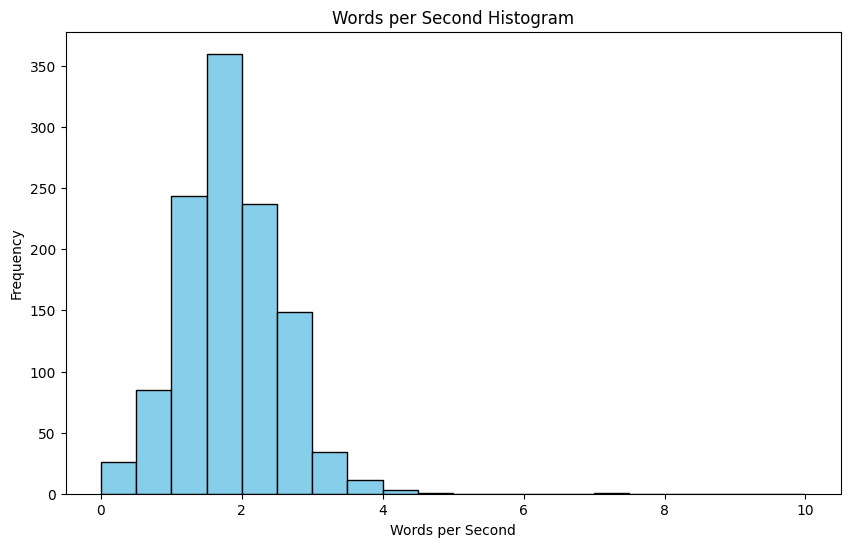

Standard Deviation of Words per Second: 0.7524321185868379
Variance of Words per Second: 0.5661540930810773


In [64]:
# Create a histogram for the 'Words per second' column
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Words per second'], bins=20, range=(0, 10), color='skyblue', edgecolor='black')
plt.title('Words per Second Histogram')
plt.xlabel('Words per Second')
plt.ylabel('Frequency')
plt.show()

# Print the standard deviation and variance of the 'Words per second' column
std_deviation = grouped_df['Words per second'].std()
variance = grouped_df['Words per second'].var()

print(f'Standard Deviation of Words per Second: {std_deviation}')
print(f'Variance of Words per Second: {variance}')

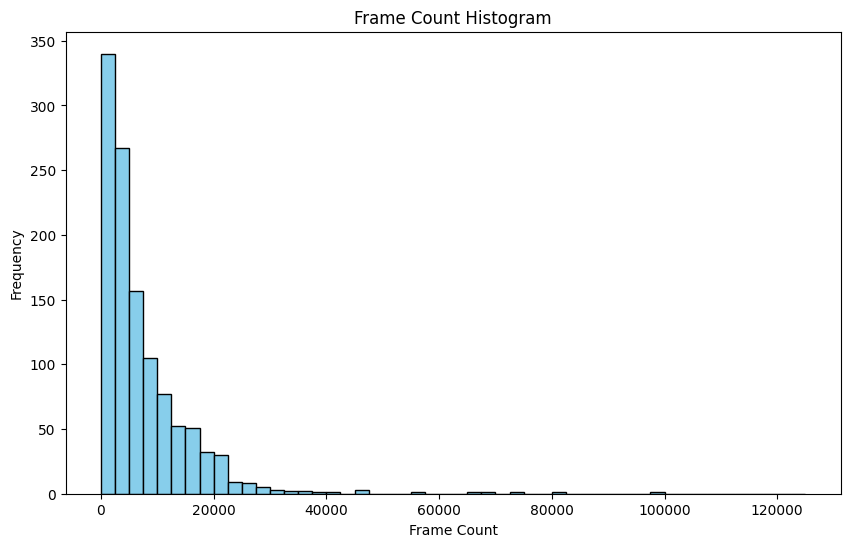

Standard Deviation of Words per Second: 9065.051135651936
Variance of Words per Second: 82175152.09198447


In [68]:
# Create a histogram for the 'Words per second' column
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['frame_count'], bins=50, range=(0, 125000), color='skyblue', edgecolor='black')
plt.title('Frame Count Histogram')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.show()

# Print the standard deviation and variance of the 'Words per second' column
std_deviation = grouped_df['frame_count'].std()
variance = grouped_df['frame_count'].var()

print(f'Standard Deviation of Words per Second: {std_deviation}')
print(f'Variance of Words per Second: {variance}')

In [84]:
filtered_df = df[df['frame_rate'] > 30]
filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,UID,Cleaned Caption,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Full Sentence,Period Count,frame_count
985,youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,00:00:03.680,00:00:07.280,"Hello! Today, I'll show three&nbsp;\nwords tha...",59.940063,3.680,7.280,221,436,0_youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,hello today i show three nbsp words that look ...,10,11,3.600,3.055556,False,1,215
986,youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,00:00:08.240,00:00:13.848,"Which? Pet, warning, and summon.",59.940063,8.240,13.848,494,830,1_youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,which pet warning and summon,5,5,5.608,0.891583,True,1,336
987,youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,00:00:13.848,00:00:16.720,Did you notice&nbsp;the difference between tho...,59.940063,13.848,16.720,830,1002,2_youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,did you notice nbsp the difference between tho...,10,11,2.872,3.830084,False,0,172
988,youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,00:00:22.000,00:00:29.840,"The word ""pet"", you can fingerspell&nbsp;\nas ...",59.940063,22.000,29.840,1319,1789,3_youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,the word pet you can fingerspell nbsp as the s...,13,15,7.840,1.913265,False,2,470
989,youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,00:00:31.040,00:00:34.269,"Or a second way, you can sign it PET.",59.940063,31.040,34.269,1861,2054,4_youtube-asl/1000-samples/-toZLgPr-7E.en.vtt,or a second way you can sign it pet,9,9,3.229,2.787241,True,1,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61891,youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,00:00:38.060,00:00:43.400,"Or interpreting a funeral service, and/or inte...",59.940063,38.060,43.400,2281,2601,5_youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,or interpreting a funeral service and or inter...,15,18,5.340,3.370787,True,1,320
61892,youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,00:00:43.520,00:00:51.800,There are multiple different kinds of proper s...,59.940063,43.520,51.800,2609,3105,6_youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,there are multiple different kinds of proper s...,17,18,8.280,2.173913,True,2,496
61893,youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,00:00:51.800,00:00:58.300,Heather will teach you those kinds of signs. S...,59.940063,51.800,58.300,3105,3495,7_youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,heather will teach you those kinds of signs sh...,17,21,6.500,3.230769,True,2,390
61894,youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,00:00:58.300,00:01:03.460,Come to the workshop so you can better interpr...,59.940063,58.300,63.460,3495,3804,8_youtube-asl/1000-samples/zjZd6kna5DI.en.vtt,come to the workshop so you can better interpr...,16,17,5.160,3.294574,False,0,309


In [81]:
unique_frame_rates = filtered_df['frame_rate'].unique()
print(unique_frame_rates)

[59.94006309 60.         59.43099788 50.         59.8630137  59.6970339 ]
